<a href="https://colab.research.google.com/github/AhmeddSafaa/IBM---Python---cool-project/blob/main/WebScraping_Tesla_Revenue_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **WebScraping - Tesla Revenue Analysis**


**Question 1**: Use yfinance to Extract Stock Data

In [2]:
import yfinance as yf

In [3]:
# Download Tesla stock data
tesla_data = yf.download('TSLA', period="max")

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Reset index to use the date as the main index
tesla_data = tesla_data.reset_index()

In [5]:
# Save the data to a CSV file
tesla_data.to_csv("tesla_data.csv", index=False)

In [6]:
# Display the first five rows
print(tesla_data.head())

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


**Question 2**: Use Webscraping to Extract Tesla Revenue Data

In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text


In [3]:
soup=BeautifulSoup(html_data,"lxml")

In [4]:
table = soup.find("table", {"class": "historical_data_table table"})

In [7]:
tables=soup.find_all("table",attrs={"class":"historical_data_table table"})
index=0
for i,table in enumerate(tables):
  if "Tesla Quarterly Revenue"  in table.text:
    index=i

Tesla_Quarterly_Revenue=tables[index].find_all("tr")
Tesla_Quarterly_Revenue_list=[]
for index,row in enumerate(Tesla_Quarterly_Revenue):
  if index==0 :
    continue
  col=row.find_all("td")
  if col!=[] :
    Date=col[0].text
    Revenue=col[1].text
    Tesla_Quarterly_Revenue_list.append({"Date":Date,"Revenue":Revenue})

tesla_revenue=pd.DataFrame(Tesla_Quarterly_Revenue_list)
tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [8]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


**Question 3**: Use yfinance to Extract Stock Data

In [9]:
import yfinance as yf

GME=yf.Ticker('GME')
gme_data=GME.history(period='2y')
gme_data=pd.DataFrame(gme_data)
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-22 00:00:00-04:00,34.667500,36.182499,34.107498,34.615002,7838000,0.0,0.0
2022-06-23 00:00:00-04:00,35.410000,35.997501,34.182499,35.505001,6682800,0.0,0.0
2022-06-24 00:00:00-04:00,35.750000,37.092499,32.882500,33.802502,16995600,0.0,0.0
2022-06-27 00:00:00-04:00,34.117500,34.262501,31.825001,32.422501,9745600,0.0,0.0
2022-06-28 00:00:00-04:00,32.752499,32.832500,30.570000,31.094999,6610000,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-14 00:00:00-04:00,29.230000,30.660000,27.410000,28.700001,82874400,0.0,0.0
2024-06-17 00:00:00-04:00,28.549999,29.180000,23.790001,25.219999,90351900,0.0,0.0
2024-06-18 00:00:00-04:00,24.580000,25.969999,23.610001,24.700001,38079200,0.0,0.0


In [10]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-06-22 00:00:00-04:00,34.667500,36.182499,34.107498,34.615002,7838000,0.0,0.0
1,2022-06-23 00:00:00-04:00,35.410000,35.997501,34.182499,35.505001,6682800,0.0,0.0
2,2022-06-24 00:00:00-04:00,35.750000,37.092499,32.882500,33.802502,16995600,0.0,0.0
3,2022-06-27 00:00:00-04:00,34.117500,34.262501,31.825001,32.422501,9745600,0.0,0.0
4,2022-06-28 00:00:00-04:00,32.752499,32.832500,30.570000,31.094999,6610000,0.0,0.0


**Question 4**: Use Webscraping to Extract GME Revenue Data

In [11]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text

In [14]:
import numpy as np
soup=BeautifulSoup(html_data,"lxml")

In [15]:
tables=soup.find_all("table",attrs={"class":"historical_data_table table"})
index=0
for i,table in enumerate(tables):
  if "GameStop Quarterly Revenue"  in table.text:
    index=i


gameStop_Quarterly_Revenue=tables[index].find_all("tr")
gameStop_Quarterly_Revenue_list=[]
for index,row in enumerate(gameStop_Quarterly_Revenue):
  if index==0 :
    continue
  col=row.find_all("td")
  if col!=[] :
    Date=col[0].text
    Revenue=col[1].text
    gameStop_Quarterly_Revenue_list.append({"Date":Date,"Revenue":Revenue})

gme_revenue=pd.DataFrame(gameStop_Quarterly_Revenue_list)
gme_revenue['Revenue']=gme_revenue['Revenue'].str.replace('$',"").str.replace(',',"").replace('', np.nan).astype(float)
gme_revenue




,Date,Revenue
0,2020-04-30,1021.0
1,2020-01-31,2194.0
2,2019-10-31,1439.0
3,2019-07-31,1286.0
4,2019-04-30,1548.0
...,...,...
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0


In [19]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


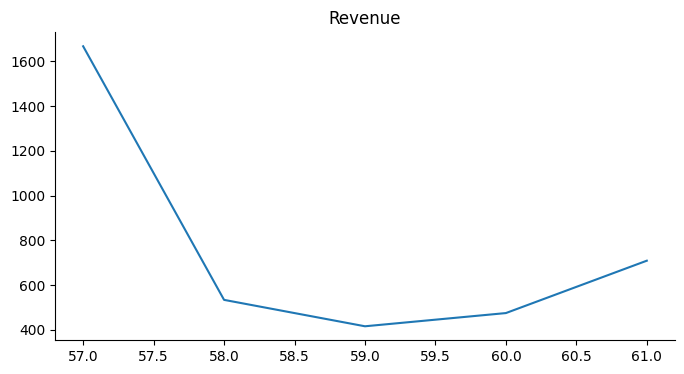

In [20]:
from matplotlib import pyplot as plt
_df_4['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

**Question 5**: Plot Tesla Stock Graph

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [44]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    # Clean the 'Revenue' column to remove '$' and ',' and then convert to float
    revenue_data_specific['Revenue'] = revenue_data_specific['Revenue'].str.replace('$', '').str.replace(',', '').astype('float')
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue, name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [45]:
Tesla=yf.Ticker("TSLA")
tesla_data=Tesla.history(period="2y")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-06-22 00:00:00-04:00,234.503326,246.833328,233.826660,236.086670,101107500,0.0,0.0
1,2022-06-23 00:00:00-04:00,237.906662,239.316666,228.636673,235.070007,104202600,0.0,0.0
2,2022-06-24 00:00:00-04:00,237.470001,246.066666,236.086670,245.706665,95770800,0.0,0.0
3,2022-06-27 00:00:00-04:00,249.366669,252.070007,242.566666,244.919998,89178300,0.0,0.0
4,2022-06-28 00:00:00-04:00,244.483337,249.970001,232.343338,232.663330,90391200,0.0,0.0


In [46]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

<ipython-input-44-aa30ed73cfc2>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-44-aa30ed73cfc2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-aa30ed73cfc2>:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

